In [9]:
# Data
import pandas as pd
import numpy as np

# Statistics
import random

# Distribution
from scipy.stats import norm 
from scipy.stats import poisson 
from scipy.stats import expon 

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics

Types of statistics:
* Descriptive statistics only specific about the data pool 
* Inferential statistics guess about a larger pool of data 

Number (quantitative) 
* continuous 
* Discrete 

Categorical (Qualitative) 
* Nominal  (unordered) 
* Ordinal (ordered)

## a. Preperation 

FIXME

- .sample(nr_picks, replace = True) 
- .append(var) 
- np.mean(var) 

## b. Basic statistics

## c. Distribution 
Types of distributions
* Normal distribution
* Binomial distribution
* Poisson distribution
* Exponential distribution
* T distribution (higher degrees of freedom (df) closer to normal distrbution)
* log-normal distribution (skewed)

### Normal distribution

A normal distribution is described by bean and std 
* 1std = 68% 
* 2std = 95% 
* 3std = 99.7% 

In [ ]:
# percentage 
norm.cdf(nr_interest, mean, std)       # (smaller than) 
1 - norm.cdf(nr_interest, mean, std)   # (larger than) 

# percentiles 
norm.ppf(%/100, mean, std)             # (smaller than value of percentile) 
1 - norm.ppf(%/100, mean, std)         # (larger than value of percentile) 

# random numbers 
norm.rvs(mean, std, size = sample_size) 

### Poisson distribution

A poisson distribution describes the probability of an event to appear at a certain rate, but random. 

* Propability (P) of some # event (N) occuring over a fixed period of time 
* Lambda (Y) gives the average # of event per time interval

Lambda changes shape of distribution, but peak is always at lambda value.

In [4]:
# Poisson probability
poisson.pmf(N, Y)       # = P (Y in time = N) 
poisson.cdf(N, Y)       # = P (Y in time < N) 
1- poisson.cdf(N, Y)    # = P (Y in time > N) 
 
# Random numbers 
poisson.rvs(Y, size = sample_size) 

### Exponential distribution
Probability of time between Poisson events 

In [ ]:
# Exponential probability
expon.cdf(wait_var, scale = Y)      # P(wait < wait_var) 
1 - expon.cdf(wait_var, scale = Y)  # P(wait > wait_var) 

### Correlation

A correlation only measures linear relationship

Plot a correlation

In [ ]:
# Scatterplot
sns.scatterplot(x = 'columnname1', y = 'columnname2', data = df)
plt.show()

# Scatterplot + line
sns.lmplot(x = 'columnname1', y = 'columnname2', data = df, ci = None)
plt.show()

Magintude of a correlation 
e.g. by Pearson product-moment correlation

In [ ]:
df['columnname1'].corr(df['columnname2'])

Causation

### Transformations

Examples of transformations are:
* Log transformation (log(x))
* Square root transformation (sqrt(x))
* Reciprocal transformation (1/x)

In [2]:
# Log transformation

np.log(df['columnname']) 

In [ ]:
# statistics
# from scipy.stats import uniform

uniform.cdf(number, lower_limit, upper_limit)   # uniform distrubution, prop of number
uniform.rvs(min, max, size = number)            # generating random numbers 

# from scipy.stats import binom
# each trial must be independent

binom.rvs(number, prop_of_succes, size = number_trails)     # show nr of successes for 'size' occurences with each max 'number'
binom.pmf(number, num_trials, prop_of_succes)                 # P(heads = number)  
binom.cdf(number, num_trials, prop_of_succes)                 # P(heads <= number)


# Sampling
Defintitions
* Sampling = Working with a subset of the whole population.
* Population = complete dataset
* Sample = subset of data we are working with.

Sampling is only valid for big datasets. For small datasets, sampling isnt useful.

Methods
* .sample(n, random_state) --> returns a random subset of n rows, and input random state. 

### A. Sample methods

#### Groups  (simple random sampling)
* Not intereseted in properties of a particular subgrow, but getting a representative sample of the larger group
* Evenly distributed subgroups

In [ ]:
# Basic sampling
pop_sample = dataset.sample()

In [ ]:
# Directed sampling
pop_sample = dataset.sample(n = 5, random_state = 10900113)

In [ ]:
# Systematic sampling (Use only when a dataset has NO pattern, so it should like noise)
sample_size = 5
pop_size = len(dataset)
interval = pop_size//sample_size
pop_sample = dataset.iloc[::interval]

In [ ]:
# Systematic sampling
shuffled = dataset.sample(frac = 1) # random select 100% of the dataset

# need to set the index from 0 to end again. drop = True clears the previous row index
shuffled = shuffled.reset_index(drop=True) 

#### Subgroups (stratified sampling)
* Split the whole population into subgroups
* Use simple random sampling on every subgroups

In [ ]:
# Select rows corresponding to the column value
select_subset = dataset['column_to_subset'].isin(list_of_subsetvalues)
subset = dataset[select_subset]

# Evaluate values, are they realistic proportions?
subset['column_to_subset'].value_counts(normalize = True)

Equal proportion sampling by .sample(frac):

In [ ]:
# Grouping before taking the random sample to avoid unrealistic sampling
subset_strat = dataset.groupby(['column_to_subset']).sample(frac = 0.1, random_state = 2021)

# Evaluate values, are they realistic proportions? --> Different proprtions
subset['column_to_subset'].value_counts(normalize = True)

Equal count sampling by .sample(n):

In [ ]:
# Grouping before taking the random sample to avoid unrealistic sampling
subset_strat = dataset.groupby(['column_to_subset']).sample(n = 15, random_state = 2021)

# Evaluate values, are they realistic proportions? --> Equal proprtions 
subset['column_to_subset'].value_counts(normalize = True)

Weighted random sampling (specify weights to adjust the relative probability of a row being sampled):

In [ ]:
# Create condition 
condition = dataset['column_to_subset'] == 'value'

# Add a column to display rows that met and dont met the condition:
dataset['weight'] = np.where(condition, 2, 1) # 2 if condition, 1 if not condition

# Grouping before taking the random sample to avoid unrealistic sampling with weight condition
subset_strat = dataset.groupby(['column_to_subset']).sample(frac = 0.1, weights = 'weight')

# Evaluate values, are they realistic proportions? --> Equal proprtions 
subset['column_to_subset'].value_counts(normalize = True)

#### Subgroups (Cluster sampling)
* Use simple random sampling to pick some subgroups
* Use simple random sampling on only those subgroups

The main benefit of cluster sampling over stratified sampling is that you can save time and money by not including every subgroup in your sample.

Stage 1: Sampling for subgroups

In [ ]:
# List all varieties
varieties_pop = list(dataset['column_to_subset'].unique())

# Sampling random subgroups from the variety list
varieties_sample = random.sample(varieties_pop, k = 3)

Stage 2: Sampling each group

In [ ]:
# Condition
variety_condition = dataset['column_to_subset'].isin(varieties_sample)
dataset_cluster = dataset[variety_condition]

# Remove levels with 0 rows
dataset_cluster_filtered['column_to_subset'] = dataset_cluster['column_to_subset'].cat.remove_unused_categories()

# Grouping
dataset_cluster_final = dataset_cluster_filtered.groupby(['column_to_subset']).sample(n = 15, random_state = 2021)

#### Some calculations and visualisation:

In [ ]:
# mean
pop_mean = np.mean(dataset['column'])
pop_mean = dataset['column'].mean()

In [ ]:
# visualzing selection bias
dataset['column'].hist(bins = np.arange(start_value, stop_value, bin_width))
plt.show()

#### Pseudo-random number
The first 'random' number calculated from a `seed`. The same seed value yields the same random numbers.

Numpy.dandom has many different generating functions
* beta(a, b, size)
* bionomial
* chiquire
* exponential
* f
* gamma
* geometric
* hypergeometric
* lognormal
* negative_bionomial
* normal(loc, scale, size)
* poisson
* standard_t
* uniform(low, high, size)

In [13]:
randoms = np.random.beta(a = 2, b = 2, size = 5000)
print(randoms)

[0.37226497 0.8485714  0.33851336 ... 0.30383753 0.81871219 0.69094141]


In [14]:
# set a seed
np.random.seed(20002299)

In [15]:
randoms = np.random.normal(loc = 2, scale = 1.5, size = 2)
print(randoms)

[1.69155053 1.20395542]


### B. Sample size
Larger sample sizes give more accurate results. 

As sample size increases, on average each sample mean has a lower relative error compared to the population mean, thus reducing the range of the distribution.

#### Relative error
Allowed difference between the popultion_mean and sample_mean.

In [ ]:
# relative error
rel_error_pct = 100 * abs(popultion_mean - sample_mean) / popultion_mean

In [ ]:
# repeating mean -> distribution

# Create an empty list
mean_attritions = []

# Loop 500 times to create 500 sample means
for i in range(500):
    mean_attritions.append(attrition_pop.sample(n=60)['Attrition'].mean())

# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins = 16)
plt.show()

Exact (dategorical, discrete) sampling distribution:

The exact sampling distribution can only be calculated if you know what the population is and if the problems are small and simple enough to compute. Otherwise, the approximate sampling distribution must be used.

In [ ]:
# Example

# Expand a grid representing 5 8-sided dice
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': [1, 2, 3, 4, 5, 6, 7, 8],
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })

# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] + 
                     dice['die3'] + dice['die4'] + 
                     dice['die5']) / 5

In [ ]:
# type to category
dice['mean_roll'] = dice['mean_roll'].astype('category')

# plot as bar
dice['mean_roll'].value_counts(sort = False).plot(kind = 'bar') # Sort False -> in order, not ordered by frequency
plt.show()

Approximate sampling distribution:

Calculating the exact sampling distribution is only possible in very simple situations. With just five eight-sided dice, the number of possible rolls is 8**5, which is over thirty thousand. When the dataset is more complicated, for example, where a variable has hundreds or thousands of categories, the number of possible outcomes becomes too difficult to compute exactly.

[6.0, 4.25, 2.75, 3.25, 3.25, 3.5, 4.0, 3.25, 3.5, 4.25, 4.0, 3.25, 4.25, 2.5, 2.0, 5.0, 3.25, 3.0, 2.5, 5.0, 4.25, 3.0, 3.5, 5.0, 3.75, 4.5, 2.5, 3.25, 2.25, 1.75, 4.25, 4.0, 2.75, 5.25, 2.75, 3.0, 2.25, 4.0, 4.0, 1.75, 3.25, 2.75, 2.5, 3.0, 2.75, 3.75, 3.25, 4.5, 3.5, 2.0, 2.5, 3.5, 2.5, 4.5, 2.75, 3.75, 2.5, 3.0, 3.0, 3.25, 2.5, 4.75, 4.75, 3.75, 3.0, 4.25, 3.5, 4.5, 3.5, 2.0, 3.5, 3.5, 4.5, 4.0, 2.25, 2.25, 2.0, 5.0, 3.25, 3.75, 2.75, 2.75, 4.5, 3.0, 2.75, 1.5, 2.5, 1.75, 2.75, 2.75, 3.0, 3.5, 3.0, 3.25, 3.75, 2.5, 2.5, 4.25, 1.25, 4.25, 5.0, 3.75, 5.0, 3.75, 3.0, 4.25, 5.0, 3.75, 3.25, 4.5, 2.25, 3.5, 3.75, 4.0, 2.25, 2.5, 4.0, 4.0, 2.75, 3.75, 2.5, 2.5, 5.0, 3.5, 3.25, 3.5, 3.5, 2.75, 2.75, 3.25, 3.75, 3.25, 4.0, 4.25, 4.75, 2.25, 3.75, 5.0, 2.75, 2.75, 3.0, 5.0, 2.25, 3.0, 2.5, 3.75, 4.0, 2.75, 3.0, 2.75, 4.25, 3.25, 2.25, 4.5, 2.75, 2.5, 3.75, 3.25, 3.5, 3.25, 3.25, 3.25, 2.25, 3.5, 5.0, 3.75, 4.25, 3.75, 3.5, 4.5, 3.25, 3.5, 4.5, 3.75, 2.0, 2.75, 4.75, 4.0, 4.75, 4.5, 3.25, 4.

(array([ 1.,  1.,  4.,  5., 11., 16., 24., 15., 24., 20., 19., 14., 14.,
        12.,  7., 11.,  1.,  0.,  0.,  1.]),
 array([1.25  , 1.4875, 1.725 , 1.9625, 2.2   , 2.4375, 2.675 , 2.9125,
        3.15  , 3.3875, 3.625 , 3.8625, 4.1   , 4.3375, 4.575 , 4.8125,
        5.05  , 5.2875, 5.525 , 5.7625, 6.    ]),
 <BarContainer object of 20 artists>)

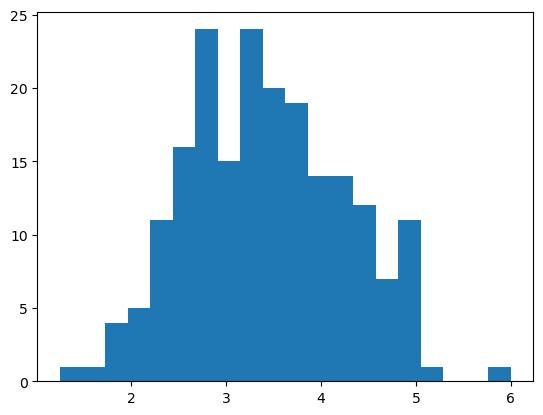

In [12]:
# Simulating the mean 

# Loop 500 times to create 500 sample means
sample_means_200 = []

for i in range(200):
    # add mean of four dice rolls
    # replace = True, a dice can roll a number several times
    sample_means_200.append( np.random.choice( list(range(1,7)), size = 4, replace = True ).mean() )

print(sample_means_200)

plt.hist(sample_means_200, bins = 20)

### Central Limit Theorem
Averages of independent samples have approximatly normal distributions.

In [ ]:
# standard deviation
dataset['column'].std(ddof=0)

# NumPy
A mathematical operation

Example with method array
* variable_list = [1,2,3]
* nplist = np.array(variable_list)
* cutoff = nplist >2                  boolean: False, False, True
* result = nplist[cutoff]

Methods in NumPy
* .round()
* np.random()      
* np.random.seed(123)                   # generate same value every same time                  
* .random.rand() 
* .random.randint()
* .column_stack()

* .sample(nr_rows, replace = False)                    

* .mean()
* .median()
* .mode()
* .min()
* .max()
* .sum()
* .quantile()
* .std()
* .var()
* .corrcoef()
* .logical_and()
* .logical_or()
* .logical_not()

In [ ]:
# Numpy Methods -- statistics examples

# mean and median

    np.mean(table['columnname'])
    np.median(table['columnname'])
    
    table.groupby('columnname1')['columnname2'].agg([np.mean, np.median])

# spread

    np.var(table['columnname'], ddof = 1)       # ddof = 1 --> sample variance      SQUARED
    np.std(table['columnname'], ddof = 1)       # no ddof --> population variance   not squared
    
    np.abs(table['columnname'])                 # absolute value
    np.linspace(start, stop, num)
    
    np.quantile(table['columnname'], [0 0.25 0.5 0.75 1])   # This example is a quartile
    
    # outlier definition
    # data < Q1 - 1.5*IQR                       # IQR = hight of boxplot
    # data > Q3 + 1.5*IQR                       # from scipy.stats import iqr 
